# Laboratorio 1: Introducción a los modelos de machine learning
A partir de este momento empezaremos con lo que viene siendo machine learning en si. Por lo cual es importante que tengamos ciertas cosas claras antes de empezar a usarlas. Debido a esto a lo largo de esta corta practica aprenderemos las bases del machine learning, la forma en la que este suele usarse en python y que condiciones deben tener para la practica. En este caso usaremos aprendizaje no supervizado, sin embargo para lo que viene siendo la clasificación supervisada todo funciona de forma muy similar.

## Parte 1: Datos
Una parte fundamental del machine learning es la manera en la que vamos a presentar los datos a nuestro algoritmo. Aqui es fundamental que los datos siempre tengan la forma ```(numero_de_datos, dimension_de_los_datos)```. Nuestro algoritmo asume que lo que va a poder acceder mediante la primera dimension de nuestra lista de datos es cada dato en si, es decir si a nuestra lista de datos le aplicamos ```datos[0]``` lo que nos debe poder entregar es el dato en la posición 0, no la dimensión 0 de todos los datos.
### Descriptores
Un descriptor es todo aquello que tal como su nombre lo indica pretende darnos información descriptiva de un objeto o un dato especifico. Los descriptores pueden variar en su dimensionalidad y pueden ir desde una sola dimensión hasta N dimensiones. A continuación les damos algunos ejemplos de descriptores:
- Una dimensión: Tamaño de un objeto.
- Dos dimensiones: posición geografica de un lugar.
- Tres dimensiones: la posición en 3 dimensiones de un voxel.
- N dimensiones: un histograma de 4 bins de las intensidades de una imagen.
Si se dan cuenta, a pesar de contar con un tamaño que varía podemos usar la información que ellos contienen para discriminar entre los datos que tengamos y así poder agruparlos segun estos descriptores. 

### Anotaciones
Una anotación es todo aquello que se usa para poder determinar la pertenencia de un dato a una clase en particular, la cual se conoce previamente. Antes de esto hemos usado anotaciones de segmentación y de detección, pero para los problemas de detección varían en su forma ligeramente haciendolas mas faciles de usar. 

Las anotaciones suelen ser numeros, enteros en los casos de clasificación, que me dan información sobre nuestros datos. En la practica estos tienen la forma  ```(numero_de_datos)```, es decir, son un vector de una unica dimensión.

Ahora deben hacer una función que realice la cantidad de datos que le sean dados por parametro en un espacio de n dimensiones y tenga la capacidad de generalos segun un numero de clusters ingresado de forma opcional. Esto lo podemos hacer con la función```make_blobs``` de sklearn.datasets. Esta funcion nos realiza un numero de datos determinados agrupados en clusters. Mas informacion la pueden encontrar en: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np


def make_data_nd(number_of_points,point_dimension,number_of_clusters=2):
    np.random.seed(42)
    # YOUR CODE HERE
    X,y = datasets.make_blobs(n_samples=number_of_points, n_features= point_dimension, centers= number_of_clusters)
    
    return X

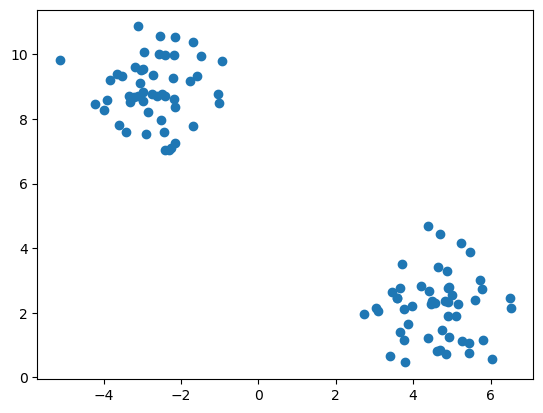

In [2]:
datos = [10,20,50,100]
dimensiones = [2,5,6,10,20]
for dato in datos:
    for dimension in dimensiones:
        assert make_data_nd(dato,dimension).shape==(dato,dimension),f'Su función retorna de forma incorrecta los datos, deberian tener forma ({dato},{dimension}) no {make_data_nd(dato,dimension).shape}'
data = make_data_nd(100,2,2)
plt.scatter(data[:,0],data[:,1])

## Parte 2: Modelos
Ahora que ya sabemos y podemos controlar los datos que vamos a usar es momento de aprender sobre los modelos en si, ya que ellos van a ser los que hacen el proceso de aprender a diferenciar los datos de forma automatica. Estos modelos hay que aprender que tiene 3 funciones principales:
- ```__init__()```
- ```fit()```
- ```predict()```
### ```__init__()```: Inicializacion
Una de las primeras cosas que debemos aprender de nuestros modelos es que son clases por ende lo que haremos será usar objetos. Todo objeto tiene una función de inicialización, esta determina los valores principales que debe detener todo objeto y son determinados por la clase de este. Existen algunos objetos que tienen parametros obligatorios y otros tienen unicamente parametros con valores opcionales. En este breve laboratorio usaremos la clase ```KMeans``` de ```sklearn.cluster``` esta tiene un objeto que realiza el algoritmo de K-Means. Ahora inicialicemos un objeto que sea de esta clase, use 2 como numero de clusters.

In [6]:
from sklearn.cluster import KMeans
model = KMeans (n_clusters=2) #Variable que contendrá el modelo de k-means
print(data)
print(data.shape)

[[-2.98837186  8.82862715]
 [ 5.72293008  3.02697174]
 [-3.05358035  9.12520872]
 [ 5.461939    3.86996267]
 [ 4.86733877  3.28031244]
 [-2.14780202 10.55232269]
 [ 4.91656964  2.80035293]
 [ 3.08921541  2.04173266]
 [-2.90130578  7.55077118]
 [-3.34841515  8.70507375]
 [-2.44166942  7.58953794]
 [ 3.40292813  0.65271307]
 [-2.97867201  9.55684617]
 [-3.83738367  9.21114736]
 [ 3.95985411  2.20542338]
 [ 3.85662554  1.65110817]
 [ 4.70010905  4.4364118 ]
 [ 3.56898634  2.4556421 ]
 [ 4.69808755  0.83019939]
 [-2.41743685  7.02671721]
 [ 4.85397258  0.72743091]
 [ 4.44751787  2.27471703]
 [ 5.43091078  1.06378223]
 [ 5.60325497  2.38595061]
 [ 4.89976163  2.75499256]
 [-0.92998481  9.78172086]
 [ 4.56277713  2.31432166]
 [-1.6966718  10.37052616]
 [ 5.1618204   2.27015436]
 [ 4.375222    4.69333885]
 [-2.743351    8.78014917]
 [-3.98771961  8.29444192]
 [-3.6601912   9.38998415]
 [-1.04354885  8.78850983]
 [-2.16557933  7.25124597]
 [ 5.22673593  4.16362531]
 [ 4.81305976  2.35848706]
 

In [48]:
assert str(type(model))=="<class 'sklearn.cluster._kmeans.KMeans'>",f"su objeto es de clase {str(type(model))} no <class 'sklearn.cluster._kmeans.KMeans'>"
assert model.n_clusters == 2, f'su modelo tiene {model.n_clusters} clusters, no 2 como se indicó'

### fit(): Entrenamiento
Otra funcion basica que tienen todos los objetos propios del machine learning es la funcion de entrenamiento, esta funcion dependiendo del tipo de algoritmo va a recibir uno o dos parametros obligatorios y varios mas opcionales. Estos parametos para aquellos modelos de aprendizaje no supervisado será unicamente los descriptores mientras que para los de aprendizaje supervisado serán los descriptores y las etiquetas. Ahora, lo que haremos será entrenar nuestro modelo en los datos contenidos en la variable ```data``` usando la funcion fit() de nuestro modelo. Pueden referirse a la documentacion de KMeans si tienen dudad sobre el uso de esta variable.

In [37]:
# YOUR CODE HERE
model.fit(data)

KMeans(n_clusters=2)

In [38]:
try:
    model.n_features_in_
except:
    assert False,f'Su modelo no fue entrenado'
assert model.n_features_in_ == 2,f'su modelo tiene un espacio de {model.n_features_in_} dimensiones, no 2 como debería'
assert len(model.labels_)==100,f'su modelo tiene {len(model.labels_)} puntos, no 100'

### predict(): Prediccion
La ultima funcion fundamental que deben aprender acerca de los modelos de machine learning es la funcion de predicción, si bien, casi todos los modelos tienen una función llamada ```fit_predict``` que hace el proceso de entrenamiento y predicción de forma simultanea, esto generalmente solo sirve para ver que tan bien se ajusta a los datos de entrenamiento. En el caso de querer revisar la pertenencia de nuevos datos sin volverlos parte de nuestra muestra debemos usar la funcion predict, que hace justamente este proceso. A diferencia de la funcion ```fit```, esta función unicamente recibe un parametro en todos los modelos, y es la lista de descriptores. A continuación deben hacer la predicción de los datos contenidos en ```data``` y guardarlos en la variable ```y```

In [40]:
y = model.predict(data) #variable que contendrá todos los datos

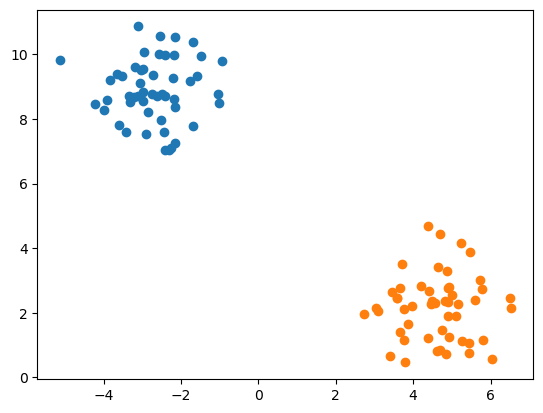

In [41]:
assert len(y) == 100, f'sus predicciones tiene {len(y)} datos, no 100'
assert len(np.unique(y))==2,f'sus predicciones tienen {len(np.unique(y))} clases, no 2'
for i in range(2):
    plt.scatter(data[y==i,0], data[y==i,1])

## Parte 3: Clasificación Jerarquica
Ahora que ya manejamos lo basico del modelo K-Means hagamos una aplicación de forma manual, haremos la clasificación jerarquica de los puntos por medio de k-means como se vio en clase. recordemos que el algoritmo para esto, al ser una clasificación jerarquica de tipo top-down es de tipo divisiva. El algoritmo debe seguir este orden:
- Asignar todos los puntos a una unica clase
- Dividir los puntos de dicha clase en 2 clases diferentes
- Para cada nivel de profundidad dividir los puntos de cada clase de la profundidad anterior en 2 clases diferentes

In [67]:
labels1 = ((KMeans (n_clusters=1)).fit(data)).predict(data) # arreglo que contiene las etiquetas de los datos asignados en un cluster
labels2 = ((KMeans (n_clusters=2)).fit(data)).predict(data) # arreglo que contiene las etiquetas de los datos asignados en dos clusters
labels4 = ((KMeans (n_clusters=4)).fit(data)).predict(data) # arreglo que contiene las etiquetas de los datos asignados en cuatro clusters
labels8 = ((KMeans (n_clusters=8)).fit(data)).predict(data) # arreglo que contiene las etiquetas de los datos asignados en ocho clusters


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


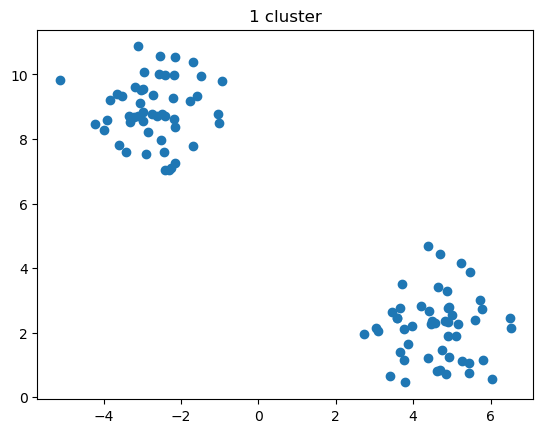

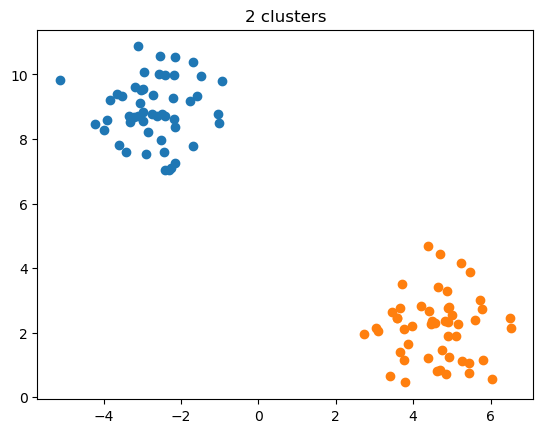

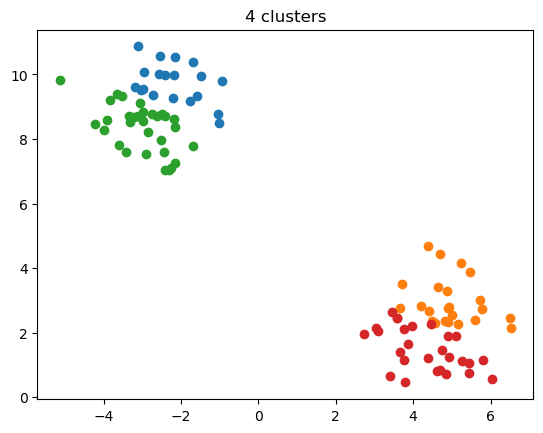

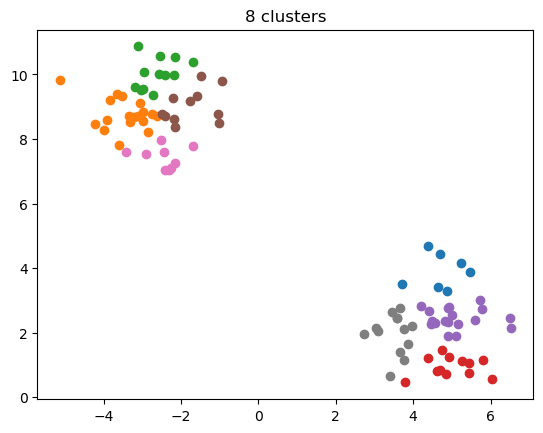

In [63]:
plt.figure()
plt.title('1 cluster')
for i in np.unique(labels1):
    plt.scatter(data[labels1==i,0],data[labels1==i,1])
plt.figure()
plt.title('2 clusters')
for i in np.unique(labels2):
    plt.scatter(data[labels2==i,0],data[labels2==i,1])
plt.figure()
plt.title('4 clusters')
for i in np.unique(labels4):
    plt.scatter(data[labels4==i,0],data[labels4==i,1])
plt.figure()
plt.title('8 clusters')
for i in np.unique(labels8):
    plt.scatter(data[labels8==i,0],data[labels8==i,1])

assert len(labels1)==len(y),f'su division usando 1 cluster tiene {len(labels1)} datos, no 100'
assert len(labels2)==len(y),f'su division usando 1 cluster tiene {len(labels2)} datos, no 100'
assert len(labels4)==len(y),f'su division usando 1 cluster tiene {len(labels4)} datos, no 100'
assert len(labels8)==len(y),f'su division usando 1 cluster tiene {len(labels8)} datos, no 100'
for i in np.unique(labels4):
    comparacion = 0
    for punto in data[labels4==i]:
        if punto not in data[labels2==i]:
            comparacion+=1
        elif comparacion == 2:
            assert False,'sus labels con 4 clusters no son una subdivisión de sus labels con 2 clusters'
for i in np.unique(labels8):
    comparacion = 0
    for punto in data[labels8==i]:
        if punto not in data[labels4==i]:
            comparacion+=1
        elif comparacion == 4:
            assert False,'sus labels con 8 clusters no son una subdivisión de sus labels con 4 clusters'
            
    